In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib
import seaborn as sn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
img=cv2.imread("C:\\Code\\Image Classifier\\model\\dataset\\lionel_messi\\avatar-leomessi.png")
img.shape

(500, 500, 3)

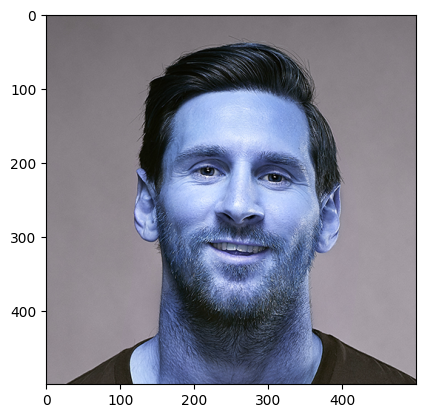

In [3]:
plt.imshow(img)

In [4]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_img.shape

(500, 500)

In [5]:
gray_img

array([[104, 101, 101, ..., 118, 118, 117],
       [103, 103, 104, ..., 119, 121, 119],
       [105, 105, 103, ..., 120, 119, 121],
       ...,
       [142, 146, 145, ...,  39,  71,  75],
       [150, 146, 146, ...,  41,  40,  59],
       [147, 149, 149, ...,  42,  40,  39]], dtype=uint8)

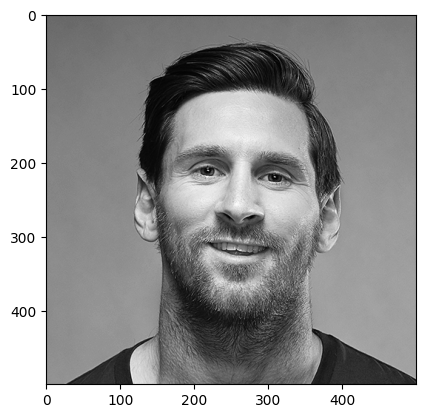

In [6]:
plt.imshow(gray_img,cmap="gray")

In [7]:
face_cascade=cv2.CascadeClassifier("C:\\Code\\Image Classifier\\model\\opencv\\haarcascade\\haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("C:\\Code\\Image Classifier\\model\\opencv\\haarcascade\\haarcascade_eye.xml")
faces=face_cascade.detectMultiScale(gray_img,1.3,5)
faces

array([[120, 101, 278, 278]])

In [8]:
x,y,w,h=faces[0]
x,y,w,h

(120, 101, 278, 278)

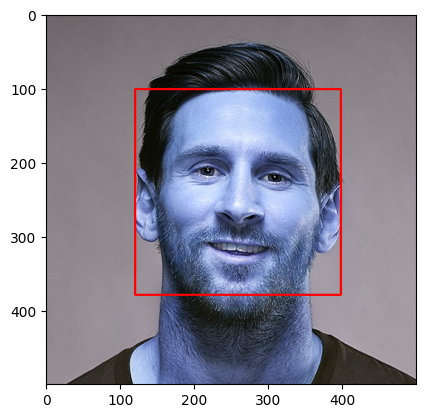

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

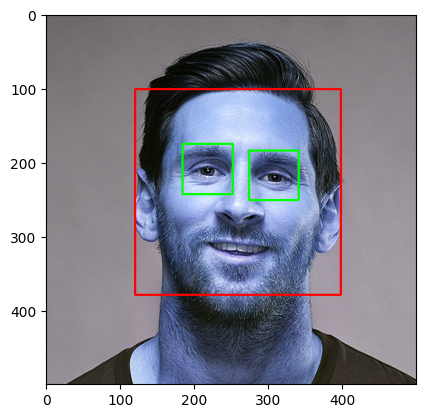

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray_img[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img)
plt.show()

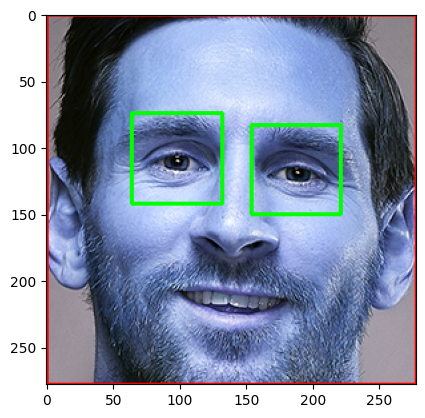

In [11]:
plt.imshow(roi_color)

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray_img,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray_img[y:y+h, x:x+w]
        roi_color=img[y:y+h, x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

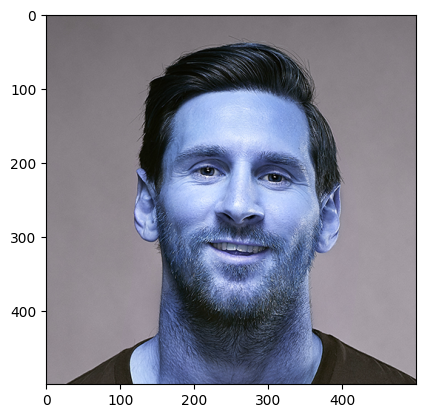

In [13]:
original_image=cv2.imread("C:\\Code\\Image Classifier\\model\\dataset\\lionel_messi\\avatar-leomessi.png")
plt.imshow(original_image)

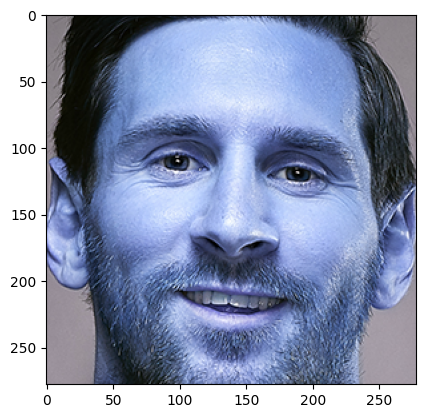

In [14]:
cropped_image=get_cropped_image_if_2_eyes("C:\\Code\\Image Classifier\\model\\dataset\\lionel_messi\\avatar-leomessi.png")
plt.imshow(cropped_image)

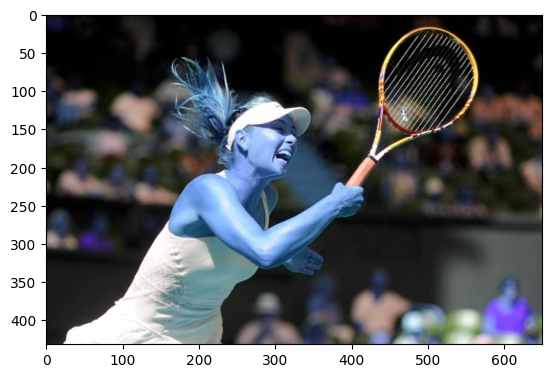

In [15]:
org_image_obstructed=cv2.imread("C:\\Code\\Image Classifier\\model\\dataset\\maria_sharapova\MariaS-W1200.jpg.gallery.jpg")
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes=get_cropped_image_if_2_eyes("C:\\Code\\Image Classifier\\model\\dataset\\maria_sharapova\MariaS-W1200.jpg.gallery.jpg")
cropped_image_no_2_eyes

In [51]:
path_to_data="C:\\Code\\Image Classifier\\model\\dataset\\"
path_to_cr_data="C:\\Code\\Image Classifier\\model\\dataset\\cropped\\"

In [52]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [53]:
img_dirs

['C:\\Code\\Image Classifier\\model\\dataset\\lionel_messi',
 'C:\\Code\\Image Classifier\\model\\dataset\\maria_sharapova',
 'C:\\Code\\Image Classifier\\model\\dataset\\roger_federer',
 'C:\\Code\\Image Classifier\\model\\dataset\\serena_williams',
 'C:\\Code\\Image Classifier\\model\\dataset\\virat_kohli']

In [54]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [55]:
#we are going to iterate through all the images
cropped_img_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('\\')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)

            cropped_file_name=celebrity_name+str(count)+".jpg"
            cropped_file_path=cropped_folder+"\\"+cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count=count+1

lionel_messi
Generating cropped images in folder:  C:\Code\Image Classifier\model\dataset\cropped\lionel_messi
maria_sharapova
Generating cropped images in folder:  C:\Code\Image Classifier\model\dataset\cropped\maria_sharapova
roger_federer
Generating cropped images in folder:  C:\Code\Image Classifier\model\dataset\cropped\roger_federer
serena_williams
Generating cropped images in folder:  C:\Code\Image Classifier\model\dataset\cropped\serena_williams
virat_kohli
Generating cropped images in folder:  C:\Code\Image Classifier\model\dataset\cropped\virat_kohli


In [56]:
celebrity_file_names_dict

{'lionel_messi': ['C:\\Code\\Image Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi1.jpg',
  'C:\\Code\\Image Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi2.jpg',
  'C:\\Code\\Image Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi3.jpg',
  'C:\\Code\\Image Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi4.jpg',
  'C:\\Code\\Image Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi5.jpg',
  'C:\\Code\\Image Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi6.jpg',
  'C:\\Code\\Image Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi7.jpg',
  'C:\\Code\\Image Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi8.jpg',
  'C:\\Code\\Image Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi9.jpg',
  'C:\\Code\\Image Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi10.jpg',
  'C:\\Code\\Image Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi1

In [57]:
import pywt

def w2d(img,mode="haar",level=1):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray=imArray/255
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0]=coeffs_H[0]*0
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H=imArray_H*255
    imArray_H=np.uint8(imArray_H)
    return imArray_H

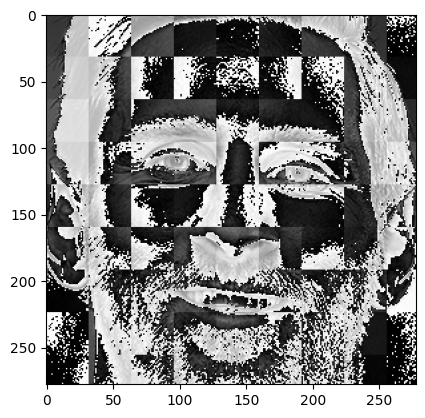

In [58]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap="gray")

In [59]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [60]:
x=[]
y=[]

for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [61]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(165, 4096)

In [94]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8333333333333334

In [96]:
len(x_test)

42

In [97]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       1.00      0.70      0.82        10
           2       0.54      1.00      0.70         7
           3       0.80      1.00      0.89         4
           4       1.00      0.92      0.96        13

    accuracy                           0.83        42
   macro avg       0.87      0.85      0.83        42
weighted avg       0.90      0.83      0.84        42



In [98]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [99]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [100]:
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [101]:
df

,model,best_score,best_params
0,svm,0.837000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.659000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.885667,{'logisticregression__C': 1}


## The best score is from logistic regression

In [102]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [103]:
best_estimators['svm'].score(x_test,y_test)

0.9047619047619048

In [104]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8809523809523809

## But svm model works well with test case

In [108]:
best_clf=best_estimators['svm']

In [109]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[ 6,  0,  0,  2,  0],
       [ 0,  9,  1,  0,  0],
       [ 0,  0,  7,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 0,  0,  1,  0, 12]], dtype=int64)

Text(50.722222222222214, 0.5, 'truth')

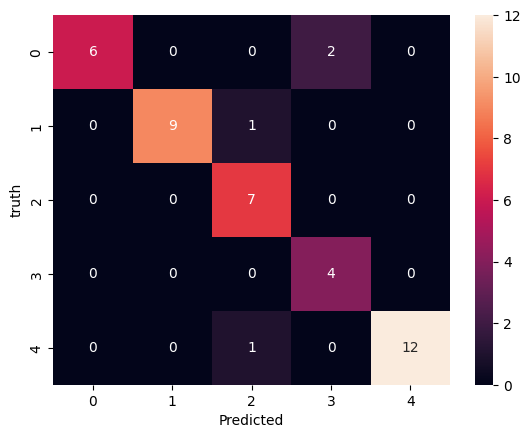

In [110]:
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('truth')

In [46]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [112]:
import joblib
joblib.dump(best_clf,'C:\\Code\\Image Classifier\\model\\saved_model.pkl')

['C:\\Code\\Image Classifier\\model\\saved_model.pkl']

In [113]:
import json
with open("C:\\Code\\Image Classifier\\model\\class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))